In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
iris = pd.read_csv("iris.csv")

In [42]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species   
4.9           3.1          1.5           0.1          setosa        3
5.8           2.7          5.1           1.9          virginica     2
              4.0          1.2           0.2          setosa        1
5.9           3.0          4.2           1.5          versicolor    1
6.2           3.4          5.4           2.3          virginica     1
                                                                   ..
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
                           3.8           1.1          versicolor    1
              2.5          4.0           1.3          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Name: count, Length: 147, dtype: int64

# Feature Engineering

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encoder = LabelEncoder()
iris["species"] = encoder.fit_transform(iris["species"])

In [46]:
iris["species"].unique()

array([0, 1, 2])

# Data Splitting

In [47]:
x = iris.iloc[:, :-1]
y = iris["species"]

In [48]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
X_train.shape

(120, 4)

In [52]:
y_train.shape

(120,)

# scalling 

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [57]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
print("Training",model.score(X_train, y_train))
print("Testing",model.score(X_test, y_test))


Training 1.0
Testing 0.9666666666666667


In [59]:
y_pred = model.predict(X_test)

In [68]:
data = pd.DataFrame({
    "Actual Value" : y_test,
    "Predict Value" : y_pred,
    "Error" : y_test - y_pred
})
data

,Actual Value,Predict Value,Error
73,1,1,0
18,0,0,0
118,2,2,0
78,1,1,0
76,1,1,0
31,0,0,0
64,1,1,0
141,2,2,0
68,1,1,0
82,1,1,0


In [62]:
from sklearn.metrics import confusion_matrix

In [65]:
con_matrix = confusion_matrix(y_test, y_pred)

In [64]:
import seaborn as sns

<Axes: >

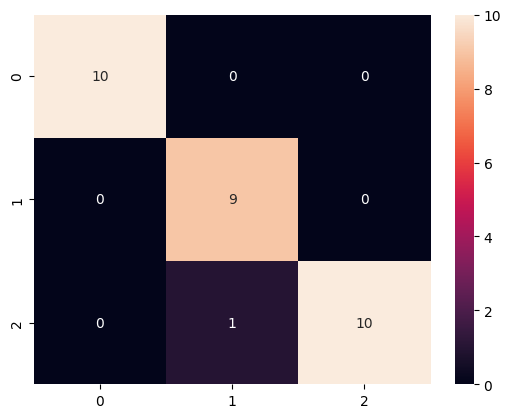

In [67]:
sns.heatmap(con_matrix, annot = True)
